In [2]:
import numpy as np
import matplotlib.pyplot as plt

1) Реализовать следующие модификации градиентного спуска:
-Классический
-Моментый
-Адаптивный
2) Протестировать каждую из реализации на следующих выбранных функциях:
Функция Маккормика
Функция Химмельблау

Функция Маккормика:
f(x, y) = sin(x+y)+(x−y)2−1.5x+2.5y+1

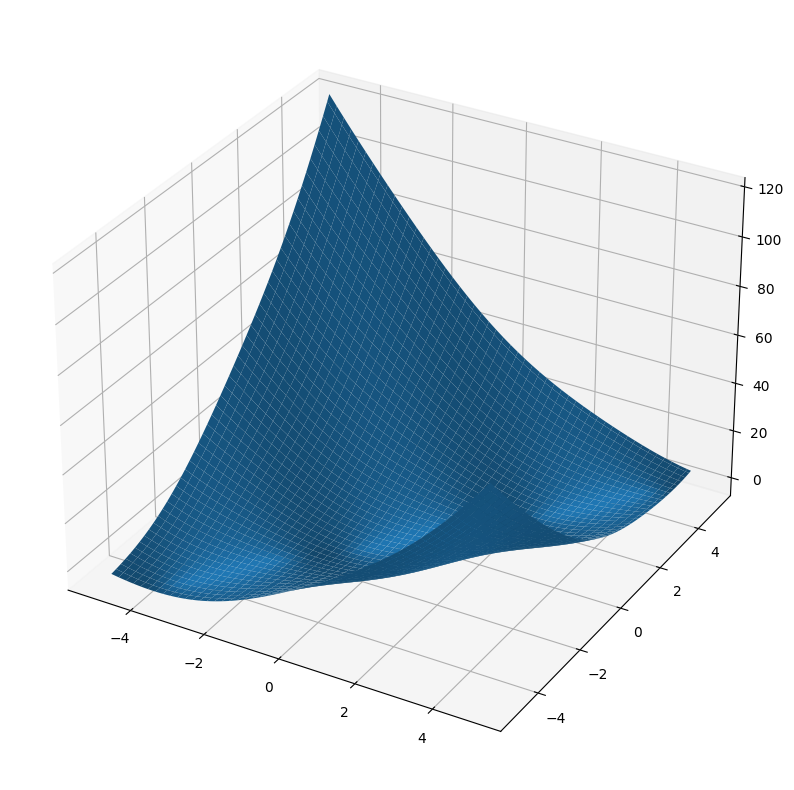

In [3]:
def f1(x, y):
    return np.sin(x + y) + (x - y) ** 2 - 1.5 * x + 2.5 * y + 1

def grad_f1(x, y):
    return np.array([np.cos(x + y) + 2 * x - 2 * y - 1.5, np.cos(x + y) - 2 * x + 2 * y + 2.5])

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f1(X,Y)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

Функция Химмельблау:
f(x, y) =  (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

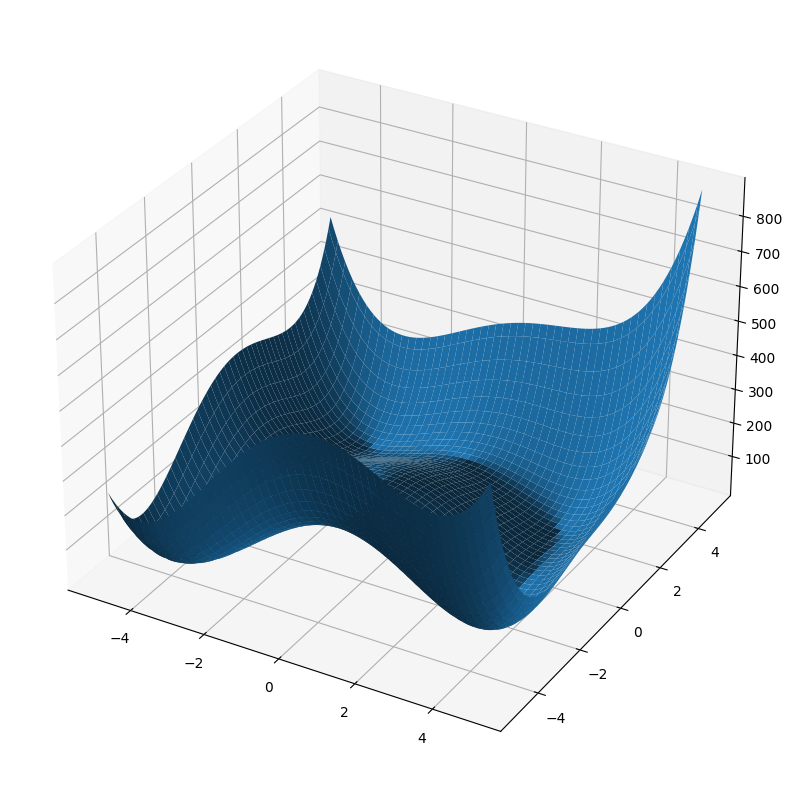

In [4]:
def f2(x, y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

def grad_f2(x, y):
    return np.array([4 * x * (x ** 2 + y - 11) + 2 * (x + y ** 2 - 7), 
                     2 * (x ** 2 + y - 11) + 4 * y * (x + y ** 2 - 7)])

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f2(X,Y)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

Функия для визуализации

In [54]:
def draw(f):
    start_point = np.array([0., 0.])
    minimizer1 = f(f1, grad_f1, start_point)[0]
    minimizer2 = f(f2, grad_f2, start_point)[0]
    path1 = f(f1, grad_f1, start_point)[1]
    path2 = f(f2, grad_f2, start_point)[1]

    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z1 = f1(X,Y)
    Z2 = f2(X,Y)

    x_values = [x for x, _ in path1]
    y_values = [y for _, y in path1]
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121,projection="3d")
    ax1.contour(X,Y,Z1, levels=50)
    ax1.plot(minimizer1[0], minimizer1[1], 'go', label='Minimum')
    ax1.plot(start_point[0], start_point[1], 'ro', label='Start')
    ax1.plot(x_values, y_values, 'b--', label='Gradient Descent Path')
    ax1.legend()
    ax1.set_title('Функция Маккормика')

    x_values = [x for x, _ in path2]
    y_values = [y for _, y in path2]
    ax2 = fig.add_subplot(122, projection="3d")
    ax2.contour(X,Y,Z2, levels=50)
    ax2.plot(minimizer2[0], minimizer2[1], 'go', label='Minimum')
    ax2.plot(start_point[0], start_point[1], 'ro', label='Start')
    ax2.plot(x_values, y_values, 'b--', label='Gradient Descent Path')
    ax2.legend()
    ax2.set_title('Функция Химмельблау')

    plt.show()

Классический градиентый спуск

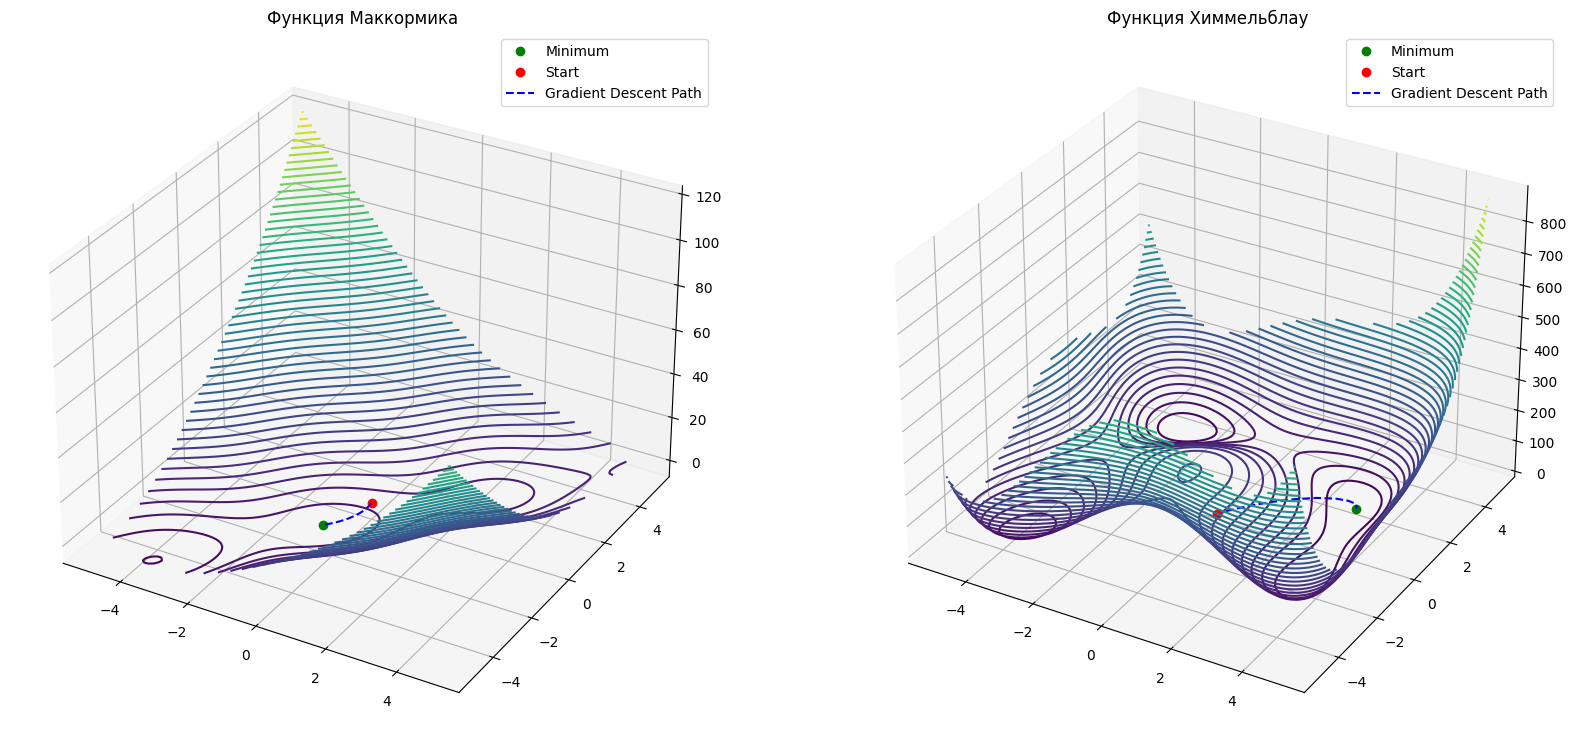

In [55]:

def gradient_descent(f, grad_f, start_point, learning_rate=0.01, max_iter=1000, tol=1e-6):
    path = []
    x = start_point
    for _ in range(max_iter):
        grad = grad_f(*x)
        if np.linalg.norm(grad) < tol:
            break
        x = x - learning_rate * grad 
        path.append(x) 
    return x, path

draw(gradient_descent)

Моментная модификация градиентного спуска:

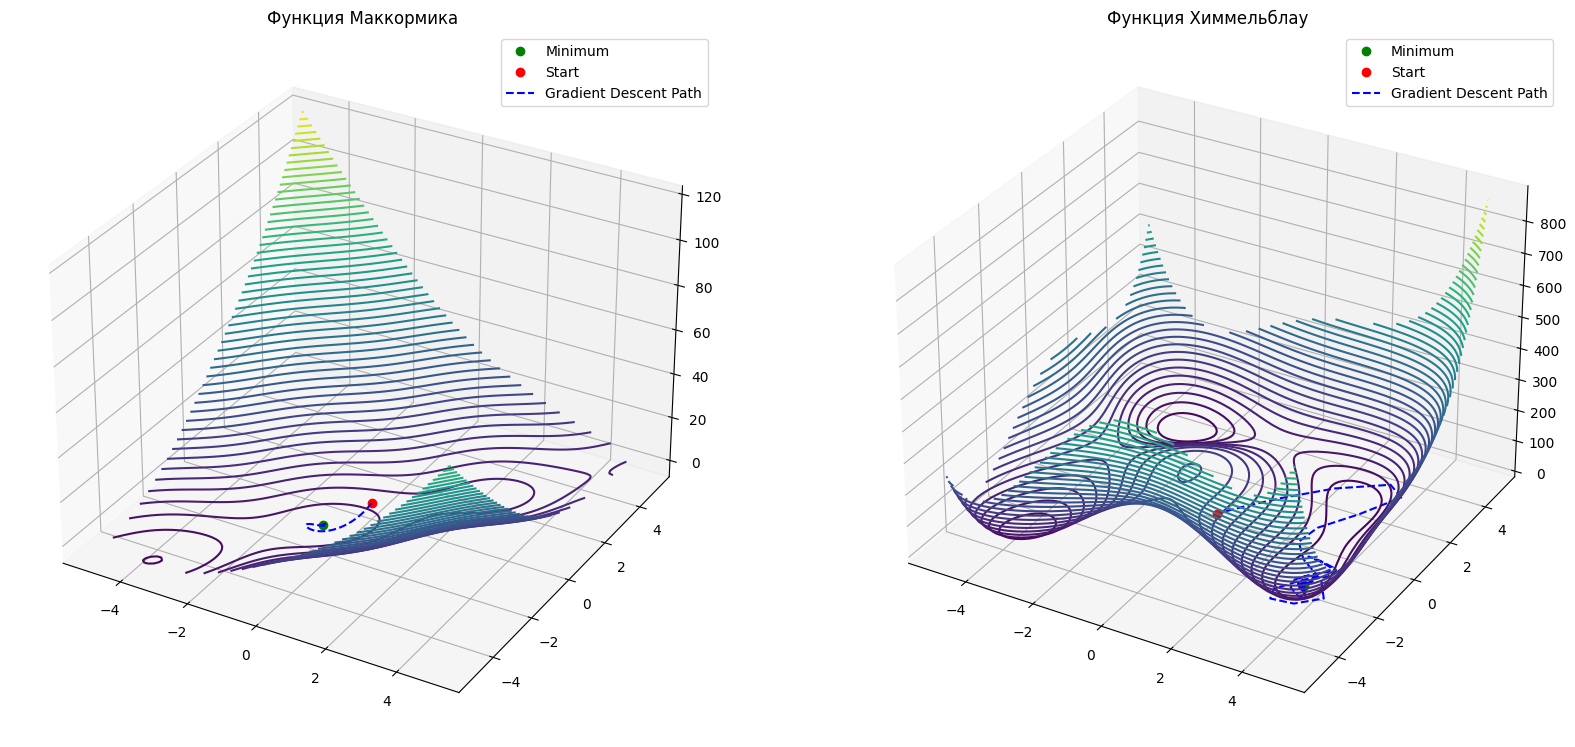

In [56]:
def momentum_gd(f, grad_f, start_point, learning_rate=0.01, max_iter=1000, tol=1e-6, momentum=0.9):
    path = []
    x = start_point
    v = np.zeros_like(x)  # Инициализируем момент нулевым вектором
    for _ in range(max_iter):
        grad = grad_f(*x)
        if np.linalg.norm(grad) < tol:
            break
        v = momentum * v + learning_rate * grad  # Обновляем момент
        x = x - v  # Обновляем веса с учетом момента
        path.append(x)
    return x, path

draw(momentum_gd)

Адаптивная модификация(ADAM)

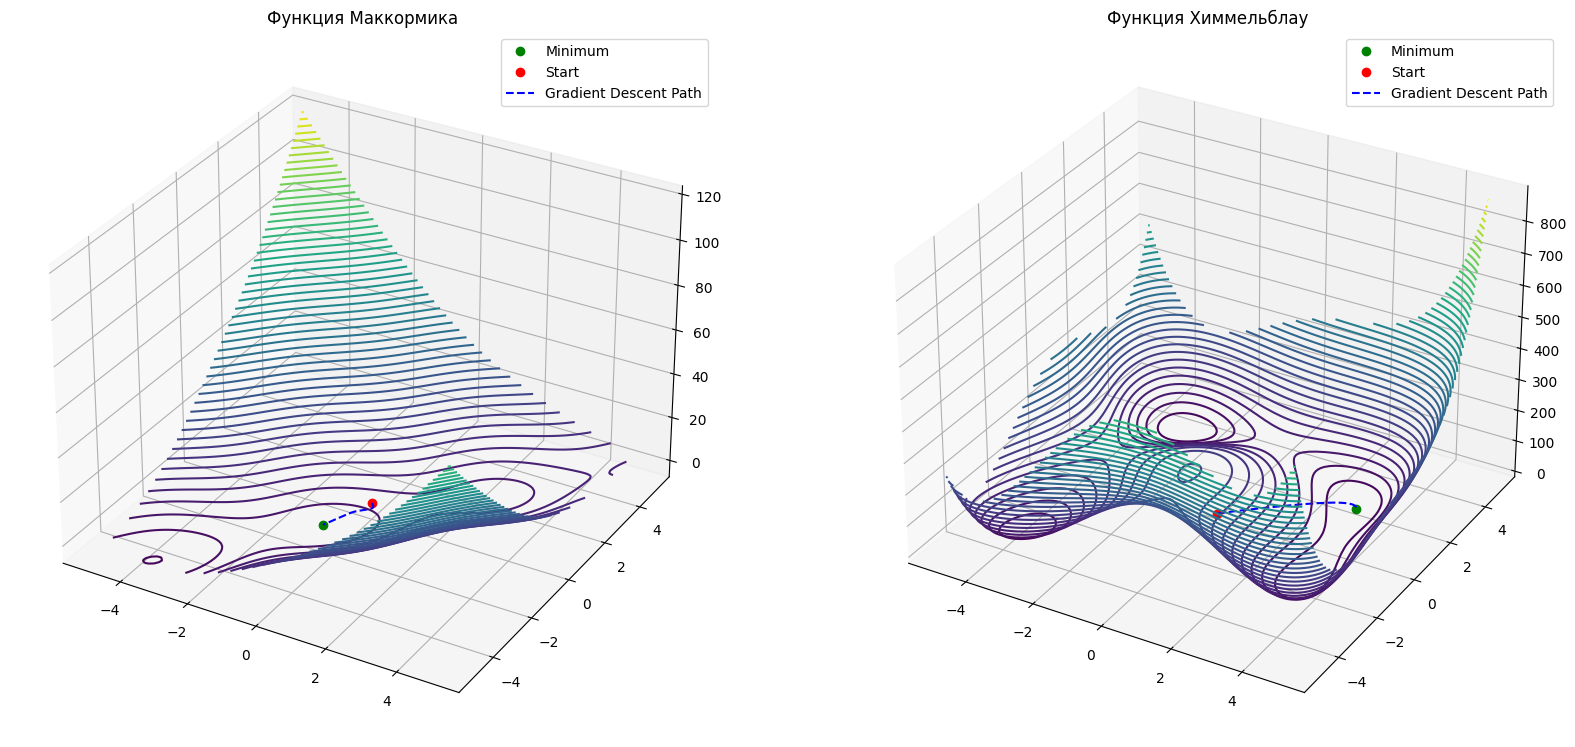

In [57]:
def adam(f, grad_f, start_point, learning_rate=0.01, max_iter=1000, tol=1e-6, beta1=0.9, beta2=0.999):
    path = []
    x = start_point
    m = np.zeros_like(x)  # Инициализация первого момента
    v = np.zeros_like(x)  # Инициализация второго момента
    t = 0  # Счетчик итераций
    epsilon = 1e-8  # Малое число для стабильности

    for _ in range(max_iter):
        t += 1
        grad = grad_f(*x)
        if np.linalg.norm(grad) < tol:
            break

        m = beta1 * m + (1 - beta1) * grad  # Обновление первого момента
        v = beta2 * v + (1 - beta2) * (grad ** 2)  # Обновление второго момента

        m_hat = m / (1 - beta1 ** t)  # Коррекция первого момента
        v_hat = v / (1 - beta2 ** t)  # Коррекция второго момента

        x = x - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)  # Обновление весов
        path.append(x)

    return x, path

draw(adam)